# Dataset Analysis

In [35]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Load the train and test datasets
new_train_data = pd.read_csv("/kaggle/input/kuet-data/train.csv")
new_test_data = pd.read_csv("/kaggle/input/kuet-data/test.csv")

# Check basic structure of the datasets
print("Train Dataset Overview:\n")
print(new_train_data.info())
print("\nTest Dataset Overview:\n")
print(new_test_data.info())


    

Train Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7635 entries, 0 to 7634
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   address                              633 non-null    object 
 1   career_objective                     3794 non-null   object 
 2   skills                               7592 non-null   object 
 3   educational_institution_name         7574 non-null   object 
 4   degree_names                         7574 non-null   object 
 5   passing_years                        7574 non-null   object 
 6   educational_results                  7574 non-null   object 
 7   result_types                         7574 non-null   object 
 8   major_field_of_studies               7574 non-null   object 
 9   professional_company_names           7568 non-null   object 
 10  company_urls                         7568 non-null   object 
 11  start

In [36]:
# Display summary statistics for numerical columns
print("\nTrain Dataset Numerical Summary:\n", new_train_data.describe())
print("\nTest Dataset Numerical Summary:\n", new_test_data.describe())

# Display first few rows of the datasets
print("\nTrain Dataset Sample Rows:\n", new_train_data.head())
print("\nTest Dataset Sample Rows:\n", new_test_data.head())


Train Dataset Numerical Summary:
        matched_score
count    7635.000000
mean        0.660667
std         0.167405
min         0.000000
25%         0.576667
50%         0.683333
75%         0.793333
max         0.970000

Test Dataset Numerical Summary:
                 ID
count  1909.000000
mean    955.000000
std     551.225151
min       1.000000
25%     478.000000
50%     955.000000
75%    1432.000000
max    1909.000000

Train Dataset Sample Rows:
   address                                   career_objective  \
0     NaN  Big data analytics working and database wareho...   
1     NaN  Fresher looking to join as a data analyst and ...   
2     NaN                                                NaN   
3     NaN  To obtain a position in a fast-paced business ...   
4     NaN  Professional accountant with an outstanding wo...   

                                              skills  \
0  ['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...   
1  ['Data Analysis', 'Data Analytics', 'Busin

## Missing Values Analysis

In [37]:

# Calculate missing value percentages
train_missing = new_train_data.isnull().mean() * 100
test_missing = new_test_data.isnull().mean() * 100

print("Train Dataset Missing Values (%):\n", train_missing[train_missing > 0].sort_values(ascending=False))
print("\nTest Dataset Missing Values (%):\n", test_missing[test_missing > 0].sort_values(ascending=False))
    

Train Dataset Missing Values (%):
 proficiency_levels                     92.547479
languages                              92.547479
address                                91.709234
expiry_dates                           79.214145
issue_dates                            79.214145
online_links                           79.214145
certification_skills                   79.214145
certification_providers                79.214145
role_positions                         64.217420
extra_curricular_organization_links    64.217420
extra_curricular_organization_names    64.217420
extra_curricular_activity_types        64.217420
career_objective                       50.307793
age_requirement                        42.750491
skills_required                        17.956778
experiencere_requirement               14.223969
positions                               0.877538
related_skils_in_job                    0.877538
end_dates                               0.877538
start_dates                       

## Unique Value Analysis

In [38]:

# Display unique values in each column
for col in new_train_data.columns:
    print(f"Column: {col}")
    print(f"Unique Values: {new_train_data[col].nunique()}")
    print("-" * 50)
    

Column: address
Unique Values: 28
--------------------------------------------------
Column: career_objective
Unique Values: 171
--------------------------------------------------
Column: skills
Unique Values: 340
--------------------------------------------------
Column: educational_institution_name
Unique Values: 328
--------------------------------------------------
Column: degree_names
Unique Values: 180
--------------------------------------------------
Column: passing_years
Unique Values: 149
--------------------------------------------------
Column: educational_results
Unique Values: 78
--------------------------------------------------
Column: result_types
Unique Values: 30
--------------------------------------------------
Column: major_field_of_studies
Unique Values: 210
--------------------------------------------------
Column: professional_company_names
Unique Values: 199
--------------------------------------------------
Column: company_urls
Unique Values: 16
-------------

## Data Visualization

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


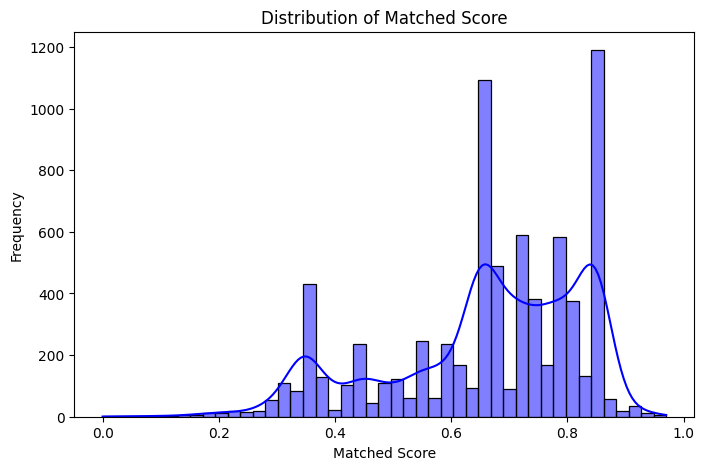

In [39]:

# Visualizing the target variable distribution
plt.figure(figsize=(8, 5))
sns.histplot(new_train_data['matched_score'], kde=True, color='blue')
plt.title('Distribution of Matched Score')
plt.xlabel('Matched Score')
plt.ylabel('Frequency')
plt.show()



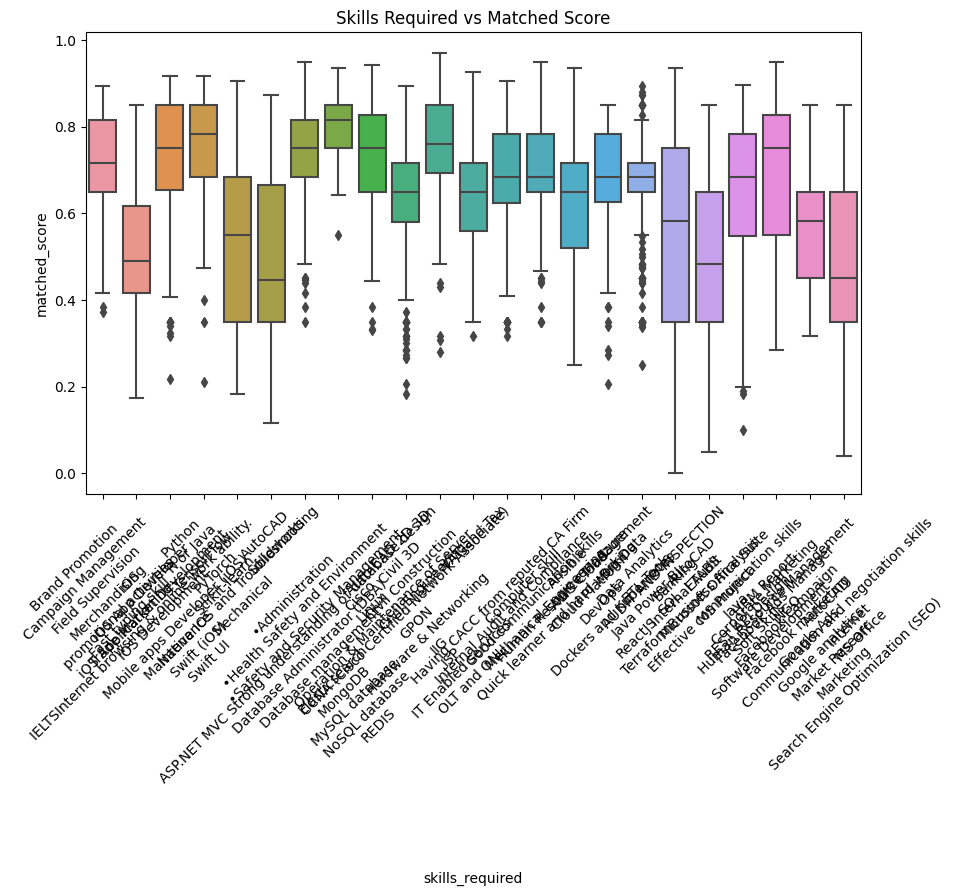

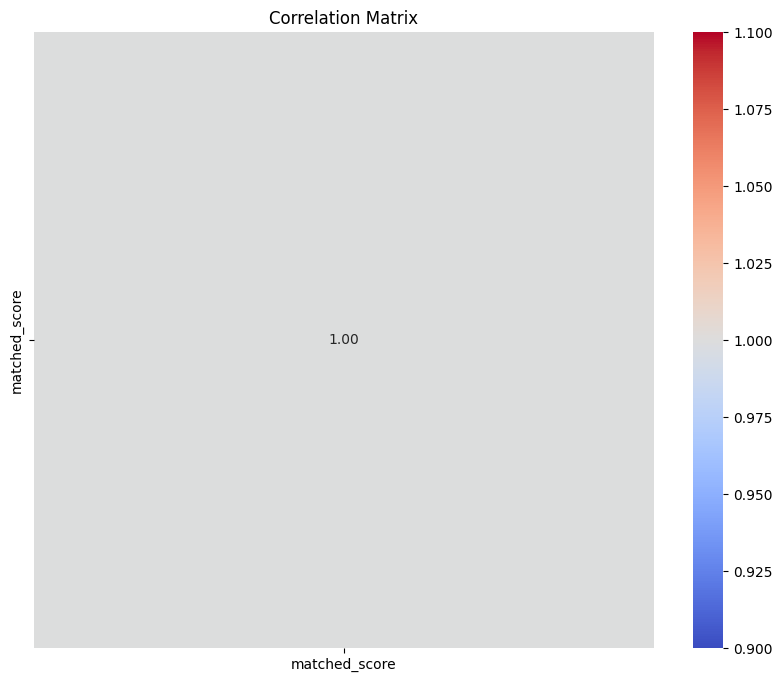

In [40]:
# Analyzing the impact of skills_required on matched_score
plt.figure(figsize=(10, 6))
sns.boxplot(x='skills_required', y='matched_score', data=new_train_data)
plt.title('Skills Required vs Matched Score')
plt.xticks(rotation=45)
plt.show()

# Correlation matrix for numerical columns
numerical_cols = new_train_data.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = new_train_data[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
    

## Handle Missing Values

In [41]:

# Filling missing values with a placeholder or strategy
new_train_data.fillna("Unknown", inplace=True)
new_test_data.fillna("Unknown", inplace=True)

print("Missing values handled successfully.")
    

Missing values handled successfully.


## Encoding Categorical Features

In [42]:

# Encode categorical columns
categorical_cols = new_train_data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_cols:
    new_train_data[col] = label_encoder.fit_transform(new_train_data[col])
    new_test_data[col] = label_encoder.transform(new_test_data[col])

print("Categorical columns encoded successfully.")
    

Categorical columns encoded successfully.


In [43]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regressor to compute feature importance
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_
features = X_train.columns
important_features = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Select top N features (e.g., top 15)
top_features = important_features['Feature'].head(15).tolist()
print("Top Features:\n", top_features)

# Reduce X_train and X_val to include only top features
X_train = X_train[top_features]
X_val = X_val[top_features]
X_test = X_test[top_features]  # Apply the same to test data


Top Features:
 ['skills_required', 'locations', 'major_field_of_studies', '\ufeffjob_position_name', 'positions', 'skills', 'educationaL_requirements', 'experiencere_requirement', 'passing_years', 'end_dates', 'degree_names', 'career_objective', 'responsibilities.1', 'age_requirement', 'responsibilities']


## Prepare Data for Modeling

In [45]:

# Drop columns not useful for modeling
X = new_train_data.drop(columns=['matched_score', 'address'])
y = new_train_data['matched_score']

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and validation sets successfully.")


Data split into training and validation sets successfully.


In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predict on validation set
y_pred_rf = rf.predict(X_val)
mse_rf = mean_squared_error(y_val, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")


Random Forest MSE: 0.0111703692678734


In [48]:
from xgboost import XGBRegressor

# Train XGBoost
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

# Predict on validation set
y_pred_xgb = xgb.predict(X_val)
mse_xgb = mean_squared_error(y_val, y_pred_xgb)
print(f"XGBoost MSE: {mse_xgb}")


XGBoost MSE: 0.01053899568888147


In [49]:
from sklearn.linear_model import LinearRegression

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on validation set
y_pred_lr = lr.predict(X_val)
mse_lr = mean_squared_error(y_val, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}")


Linear Regression MSE: 0.023029894230111148


In [50]:
import lightgbm as lgb
from lightgbm.callback import early_stopping

# Train LightGBM
lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_val, y_val, reference=lgb_train)

params = {
    'objective': 'regression',
    'metric': 'mse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31
}

# Train with early stopping callback
model_lgb = lgb.train(
    params,
    lgb_train,
    valid_sets=lgb_val,
    callbacks=[early_stopping(stopping_rounds=10)]
)

# Predict on validation set
y_pred_lgb = model_lgb.predict(X_val, num_iteration=model_lgb.best_iteration)
mse_lgb = mean_squared_error(y_val, y_pred_lgb)
print(f"LightGBM MSE: {mse_lgb}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003902 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3182
[LightGBM] [Info] Number of data points in the train set: 6108, number of used features: 33
[LightGBM] [Info] Start training from score 0.658422
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[98]	valid_0's l2: 0.0100886
LightGBM MSE: 0.010088640104460754


In [52]:
# Ensure test data has the same features as the training data
X_test = new_test_data[top_features]  # Use the same `top_features` list from training


In [59]:
# Align test data with training features
# Check if columns match after alignment
print("Training features:", X_train.columns.tolist())
print("Test features:", X_test.columns.tolist())


Training features: ['career_objective', 'skills', 'educational_institution_name', 'degree_names', 'passing_years', 'educational_results', 'result_types', 'major_field_of_studies', 'professional_company_names', 'company_urls', 'start_dates', 'end_dates', 'related_skils_in_job', 'positions', 'locations', 'responsibilities', 'extra_curricular_activity_types', 'extra_curricular_organization_names', 'extra_curricular_organization_links', 'role_positions', 'languages', 'proficiency_levels', 'certification_providers', 'certification_skills', 'online_links', 'issue_dates', 'expiry_dates', '\ufeffjob_position_name', 'educationaL_requirements', 'experiencere_requirement', 'age_requirement', 'responsibilities.1', 'skills_required']
Test features: ['career_objective', 'skills', 'educational_institution_name', 'degree_names', 'passing_years', 'educational_results', 'result_types', 'major_field_of_studies', 'professional_company_names', 'company_urls', 'start_dates', 'end_dates', 'related_skils_in_j

In [60]:
print("Test features:", X_test.columns)

Test features: Index(['career_objective', 'skills', 'educational_institution_name',
       'degree_names', 'passing_years', 'educational_results', 'result_types',
       'major_field_of_studies', 'professional_company_names', 'company_urls',
       'start_dates', 'end_dates', 'related_skils_in_job', 'positions',
       'locations', 'responsibilities', 'extra_curricular_activity_types',
       'extra_curricular_organization_names',
       'extra_curricular_organization_links', 'role_positions', 'languages',
       'proficiency_levels', 'certification_providers', 'certification_skills',
       'online_links', 'issue_dates', 'expiry_dates', '﻿job_position_name',
       'educationaL_requirements', 'experiencere_requirement',
       'age_requirement', 'responsibilities.1', 'skills_required'],
      dtype='object')


In [62]:
# Predict on test data
# Predict on test data
test_predictions = model_lgb.predict(X_test, num_iteration=model_lgb.best_iteration)

# Prepare submission file
submission = pd.DataFrame({
    "ID": new_test_data["ID"],  # Replace with your test dataset's identifier column
    "Predicted_Score": test_predictions
})

# Save to CSV
submission.to_csv("submission2.csv", index=False)
print("Submission file 'submission.csv' created successfully!")



Submission file 'submission.csv' created successfully!


-----------------------skip now ---------------

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict on the validation set
y_pred_val = rf_regressor.predict(X_val)

# Evaluate the model
mse_val = mean_squared_error(y_val, y_pred_val)
print(f"Validation MSE: {mse_val}")


Validation MSE: 0.0111703692678734


In [64]:
# Predict on test data
test_predictions = rf_regressor.predict(X_test)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=10,  # Test only 10 random combinations
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Best model and parameters
best_rf = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
test_predictions = rf_regressor.predict(X_test)

In [66]:
import pandas as pd

# Prepare submission dataframe
submission = pd.DataFrame({
    "ID": new_test_data["ID"],  # Replace "ID" with the identifier column in your test data
    "Predicted_Score": test_predictions
})

# Save to CSV
submission.to_csv("submission_random_3.csv", index=False)
print("Submission file 'submission.csv' created successfully!")


Submission file 'submission.csv' created successfully!


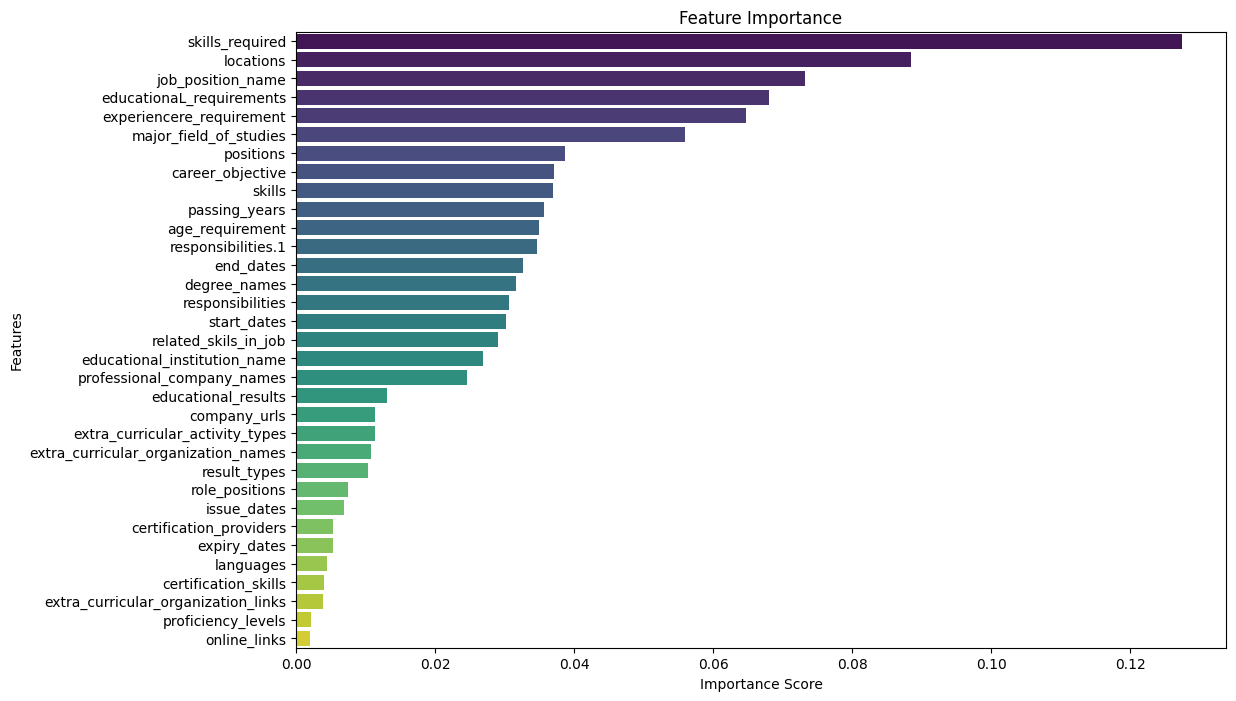

In [16]:

# Train Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Plot feature importance
importance = rf.feature_importances_
indices = np.argsort(importance)[::-1]
features = X_train.columns

plt.figure(figsize=(12, 8))
sns.barplot(x=importance[indices], y=features[indices], palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()
    

In [17]:
# Drop columns that were not used for training
X_test = new_test_data.drop(columns=['address'])  # Replace 'address' with irrelevant columns

# Ensure the columns in the test set match the training set
X_test = X_test[X_train.columns]


In [18]:
# Predict on the test data
test_predictions = rf.predict(X_test)


In [19]:
# Prepare the submission file
submission = pd.DataFrame({
    "ID": new_test_data["ID"],  # Replace "ID" with the unique identifier column in your test data
    "Predicted_Score": test_predictions
})

# Save the predictions to a CSV file
submission.to_csv("submission.csv", index=False)
print("Submission file created successfully!")


Submission file created successfully!


In [20]:
print(submission)

        ID  Predicted_Score
0        1         0.735427
1        2         0.600700
2        3         0.609800
3        4         0.446033
4        5         0.692753
...    ...              ...
1904  1905         0.672933
1905  1906         0.712933
1906  1907         0.598200
1907  1908         0.666563
1908  1909         0.669167

[1909 rows x 2 columns]


## Save Cleaned Data

In [ ]:

# Save the processed data for reuse
new_train_data.to_csv("cleaned_train_data.csv", index=False)
new_test_data.to_csv("cleaned_test_data.csv", index=False)

print("Cleaned data saved successfully.")
    